In [3]:
import glob
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, confusion_matrix

In [4]:
def tpr(tp, fn):
    if tp == 0 and fn == 0:
        return 0
    return tp / (tp + fn)


def tnr(tn, fp):
    if tn == 0 and fp == 0:
        return 0
    return tn / (tn + fp)


def ppv(tp, fp):
    if tp == 0 and fp == 0:
        return 0
    return tp / (tp + fp)


def fpr(fp, tn):
    if fp == 0 and fp == 0:
        return 0
    return fp / (fp + tn)


def balanced_acc(tpr, tnr):
    return (tpr + tnr) / 2


def f1(ppv, tpr):
    if ppv == 0 and tpr == 0:
        return 0
    return 2 * ppv * tpr / (ppv + tpr)


In [5]:
folds = glob.glob("folds/*")

for i, fold in enumerate(folds):
    with open(fold, "rb") as f:
        fold_dict = pkl.load(f)

    y_test = fold_dict["y_test"]

    if i == 0:
        global_target = y_test

    else:
        global_target = np.hstack((global_target,y_test))

global_target.shape

(18587,)

In [6]:
np.unique(global_target, return_counts=True)

(array([0, 1]), array([9267, 9320]))

In [11]:
results_list = glob.glob("grid_results/*")

print("numero de redes treinadas: ", len(results_list))

metrics_dict = {}
auc_list = {
    "index": [],
    "auc": [],
    "fit_time": [],
    "predict_time": [],
}

FPR_list = TPR_list = []

for i, file in enumerate(results_list):
    with open(file, "rb") as handle:
        result = pkl.load(handle)
        predicted = result["y_predict"]
        fit_time = result["fit_time"][0]
        predict_time = result["predict_time"][0]

    metrics_dict[i] = {
        "file_name": 0,
        "tp": [],
        "tn": [],
        "fp": [],
        "fn": [],
        "th": [],
        "tpr": [],
        "fpr": [],
        "tnr": [],
        "ppv": [],
        "bacc": [],
        "f1": [],
        "auc": 0,
    }

    metrics_dict[i]["file_name"] = file.split("/")[-1]

    threshold_eval = np.linspace(0, 1, num=25)

    for thres in threshold_eval:

        predictions = np.zeros(predicted.shape)

        predictions[predicted > thres] = 1

        TP = 0

        TN = 0

        FP = 0

        FN = 0

        for pred, tg in zip(predictions == 1, global_target):

            if pred == 1 and tg == 1:
                TP += 1

            elif pred == 0 and tg == 0:
                TN += 1

            elif pred == 1 and tg == 0:
                FP += 1

            elif pred == 0 and tg == 1:
                FN += 1

        TPR = tpr(TP, FN)

        FPR = fpr(FP, TN)

        TNR = tnr(TN, FP)

        PPV = ppv(TP, FP)

        BACC = balanced_acc(TPR, TNR)

        F1 = f1(PPV, TPR)

        metrics_dict[i]["tp"].append(TP)
        metrics_dict[i]["tn"].append(TN)
        metrics_dict[i]["fp"].append(FP)
        metrics_dict[i]["fn"].append(FN)
        metrics_dict[i]["tpr"].append(TPR)
        metrics_dict[i]["fpr"].append(FPR)
        metrics_dict[i]["tnr"].append(TNR)
        metrics_dict[i]["ppv"].append(PPV)
        metrics_dict[i]["bacc"].append(BACC)
        metrics_dict[i]["f1"].append(F1)
        metrics_dict[i]["th"].append(thres)

    metrics_dict[i]["auc"] = auc(metrics_dict[i]["fpr"], metrics_dict[i]["tpr"])

    auc_list["index"].append(i)
    auc_list["auc"].append(metrics_dict[i]["auc"])
    auc_list["fit_time"].append(fit_time)
    auc_list["predict_time"].append(predict_time)

auc_df = pd.DataFrame(auc_list).sort_values(by=["auc"], ascending=False)

auc_df.head(10)

numero de redes treinadas:  624


,index,auc,fit_time,predict_time
152,152,0.748922,3.359063,0.038209
611,611,0.748890,3.375073,0.036793
73,73,0.748841,3.217734,0.035535
185,185,0.748701,3.657829,0.037469
212,212,0.748484,3.635718,0.040042
383,383,0.748358,3.426438,0.038873
280,280,0.748343,3.382346,0.041448
582,582,0.748187,3.633142,0.036197
47,47,0.748143,3.153247,0.037586
44,44,0.748037,3.399086,0.039779


sem_tp_doador_layers_(3, 3)__activation_function_tanh__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.85__Beta2_0.85.pkl
0.7489223088896824


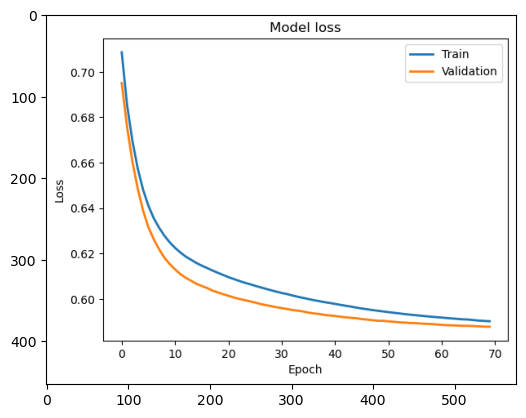

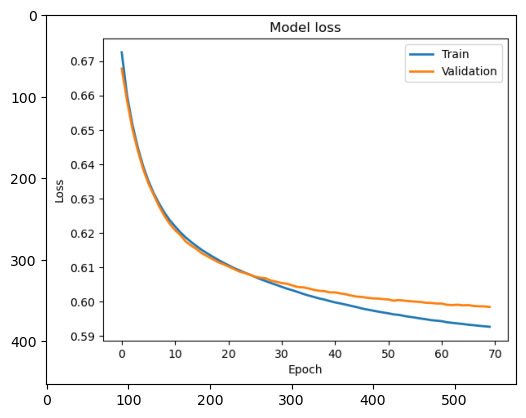

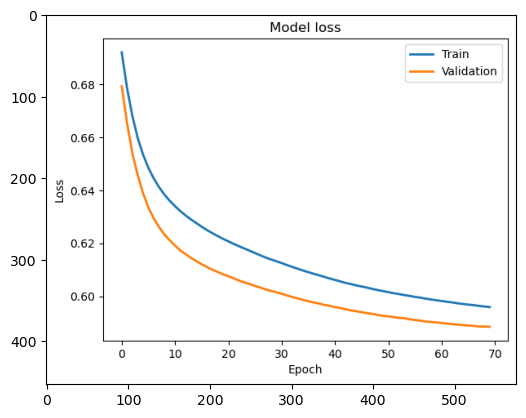

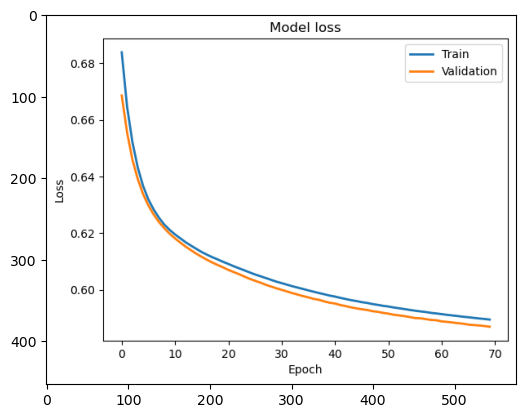

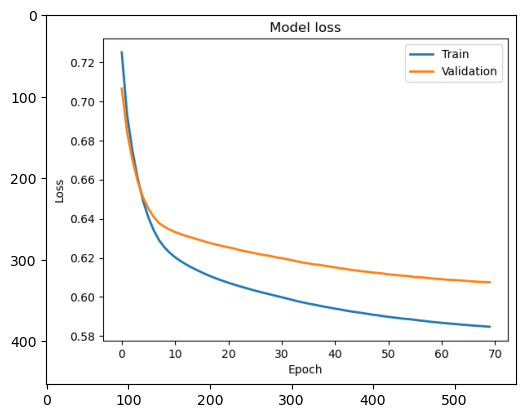

sem_tp_doador_layers_(3, 3)__activation_function_tanh__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.99__Beta2_0.85.pkl
0.7488904975011705


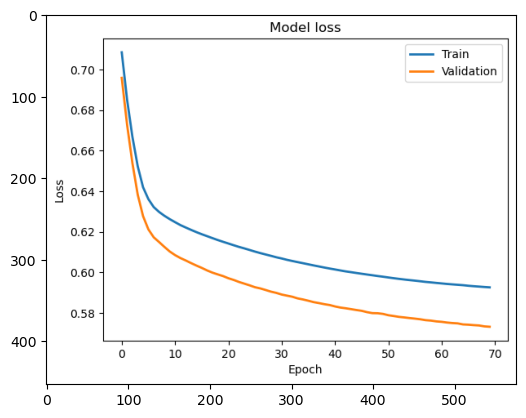

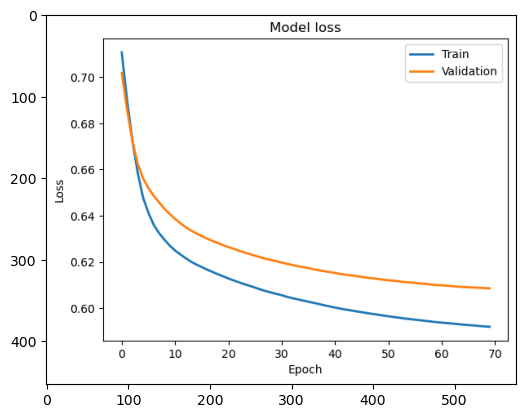

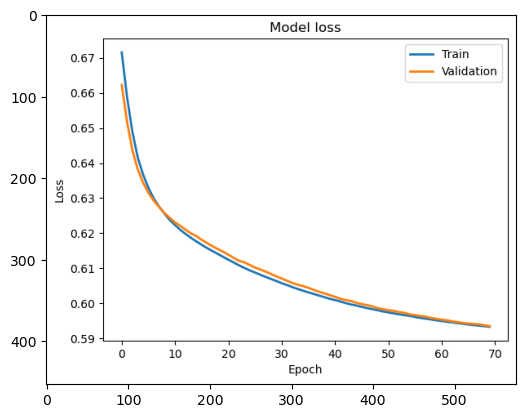

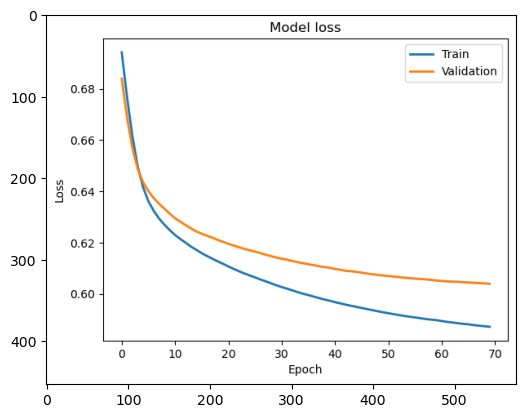

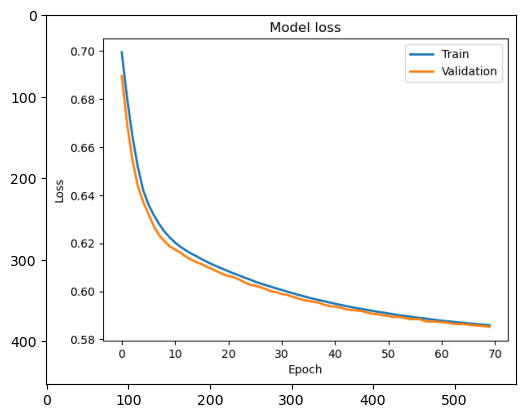

sem_tp_doador_layers_(3, 3)__activation_function_tanh__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.9__Beta2_0.99.pkl
0.7488410465674731


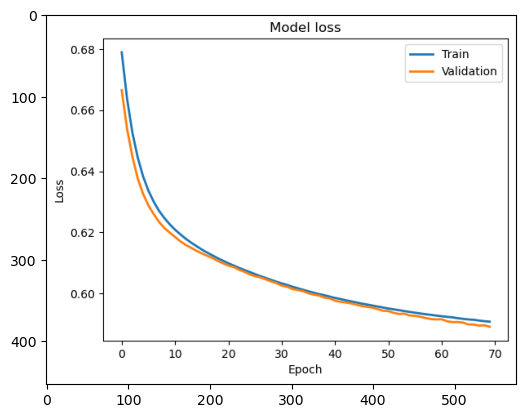

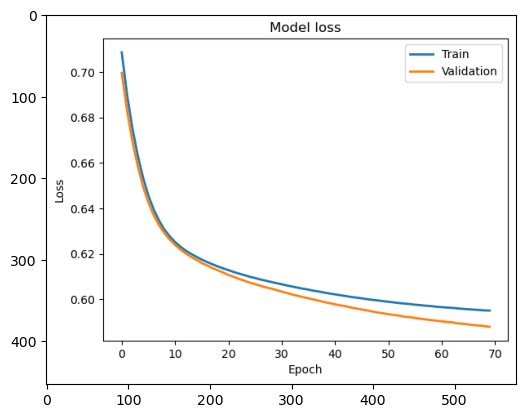

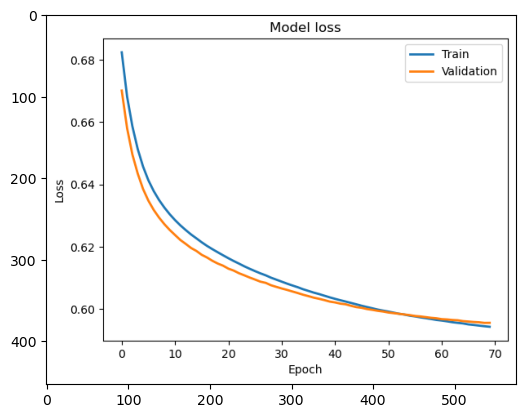

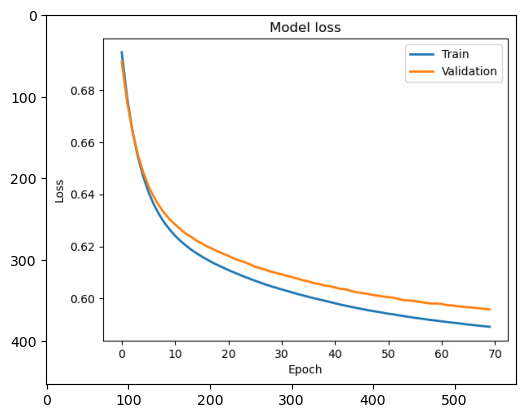

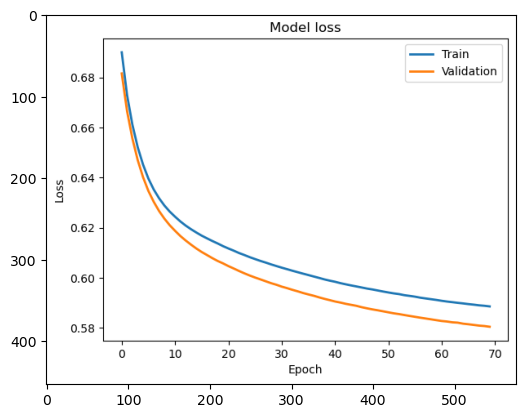

sem_tp_doador_layers_(3, 3)__activation_function_linear__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.99__Beta2_0.85.pkl
0.7487007059523131


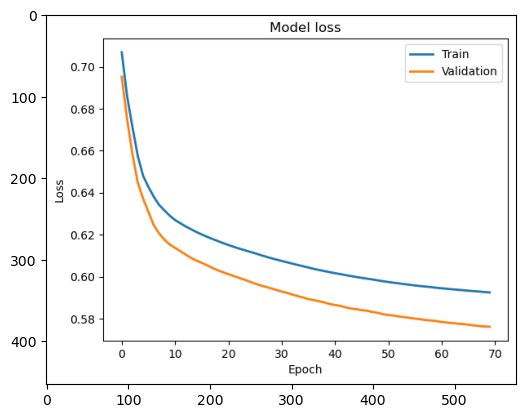

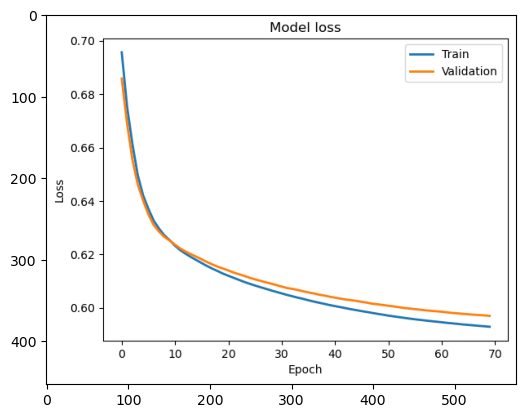

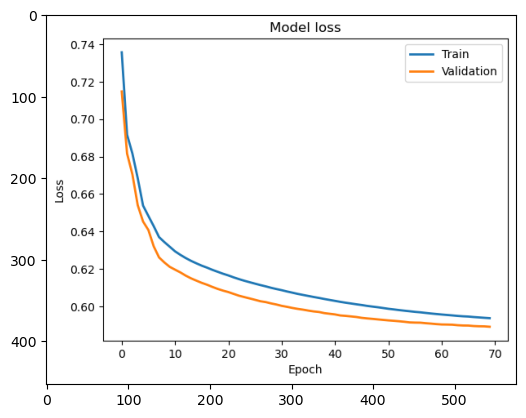

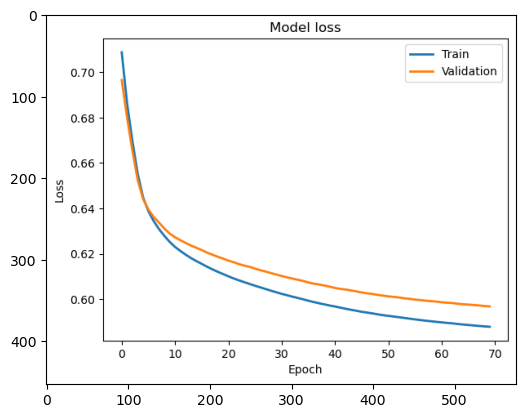

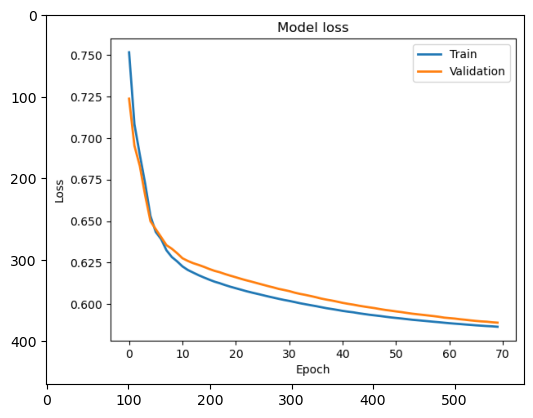

sem_tp_doador_layers_(3, 3)__activation_function_linear__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.99__Beta2_0.9.pkl
0.7484842032575789


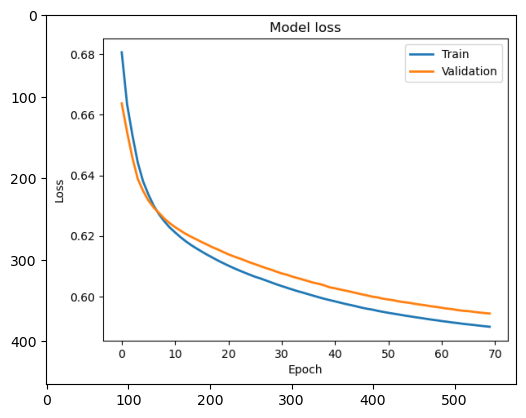

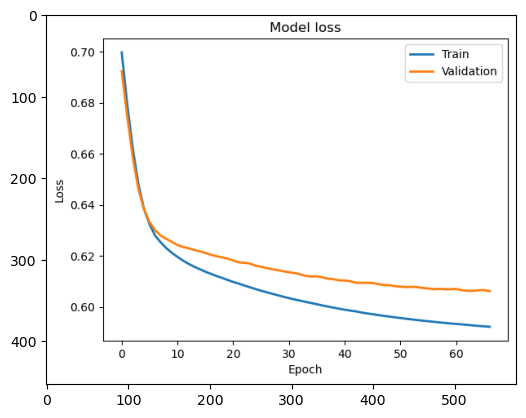

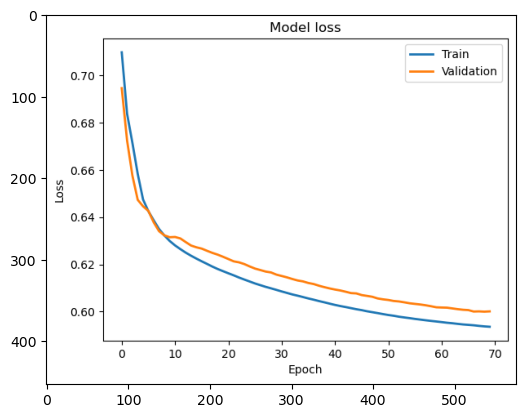

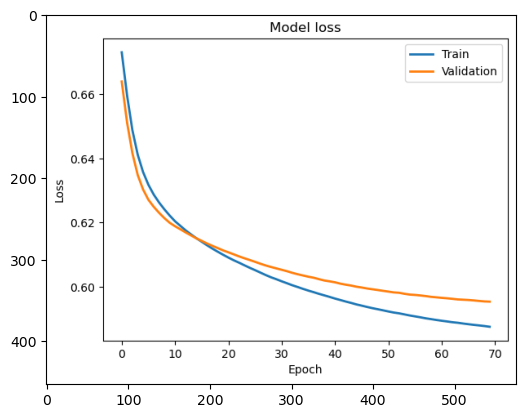

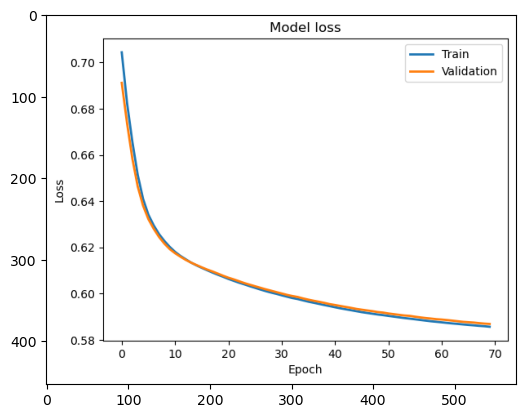

sem_tp_doador_layers_(3, 3)__activation_function_tanh__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.99__Beta2_0.9.pkl
0.7483584513046664


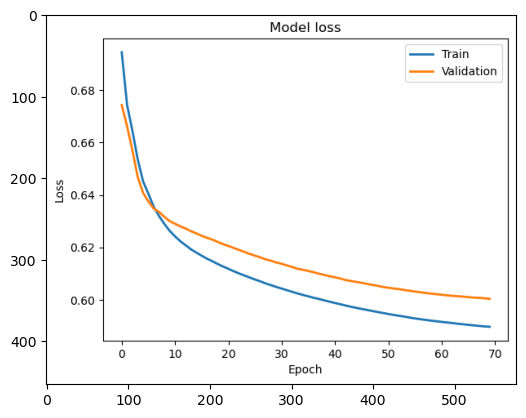

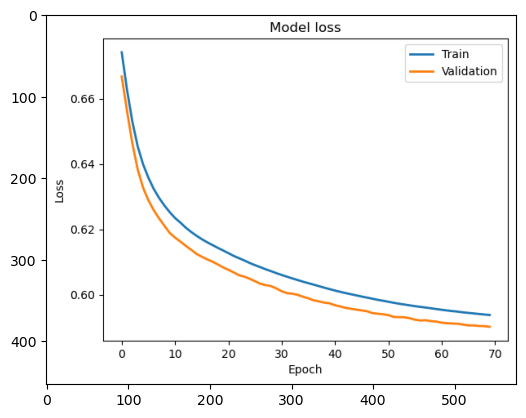

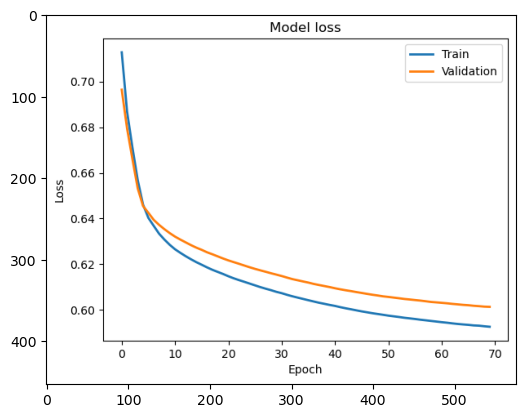

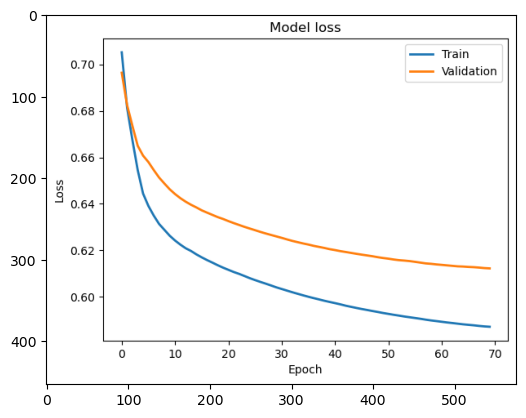

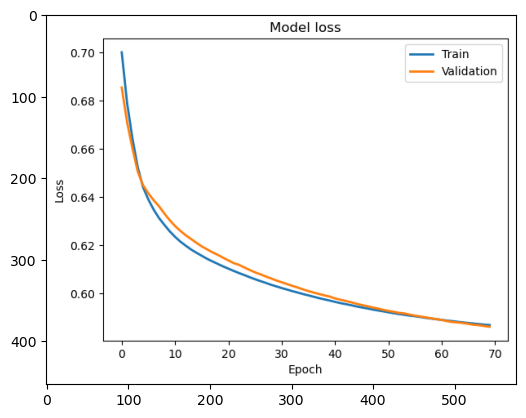

sem_tp_doador_layers_(3, 3)__activation_function_sigmoid__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.9__Beta2_0.99.pkl
0.7483433995102842


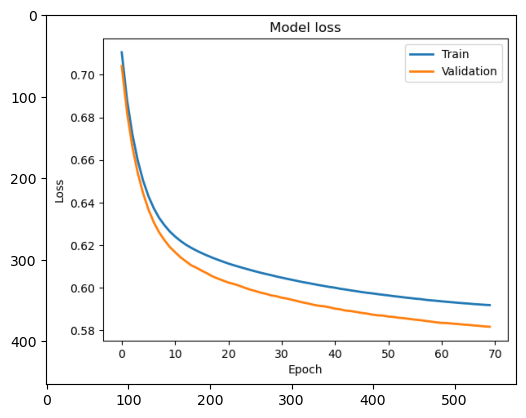

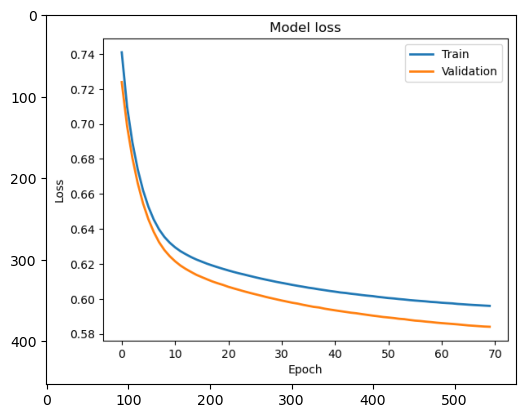

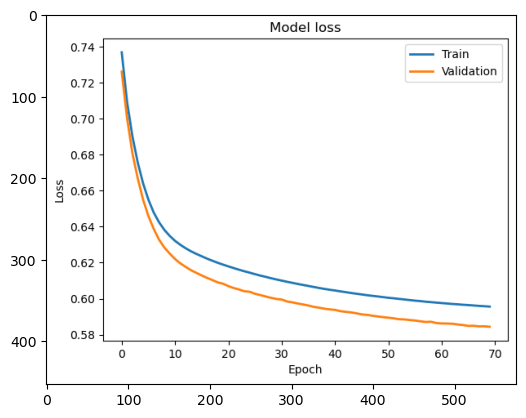

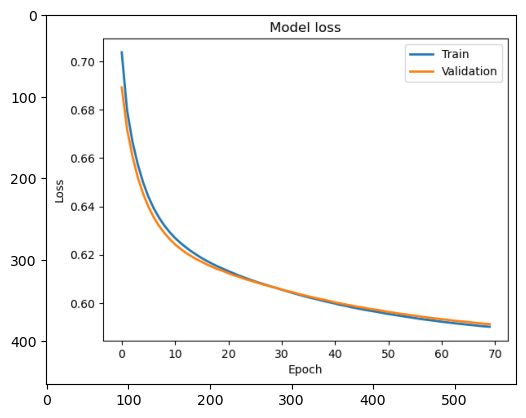

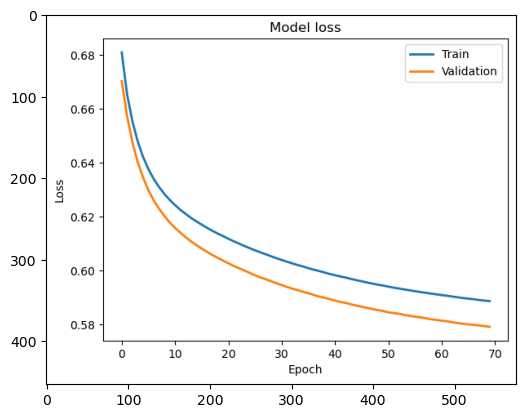

sem_tp_doador_layers_(3, 3)__activation_function_linear__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.9__Beta2_0.9.pkl
0.7481869766317419


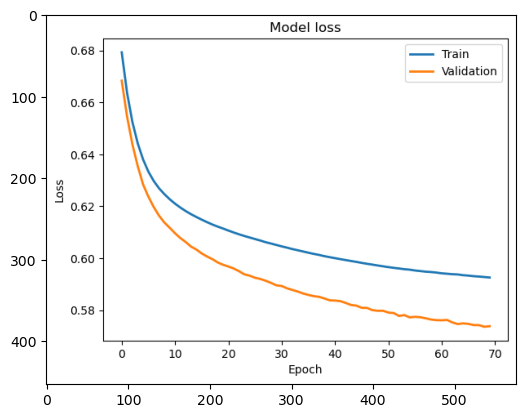

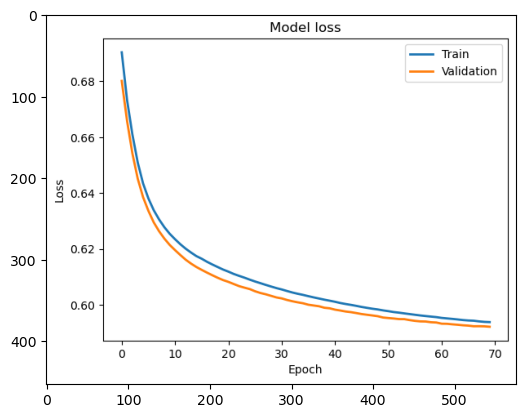

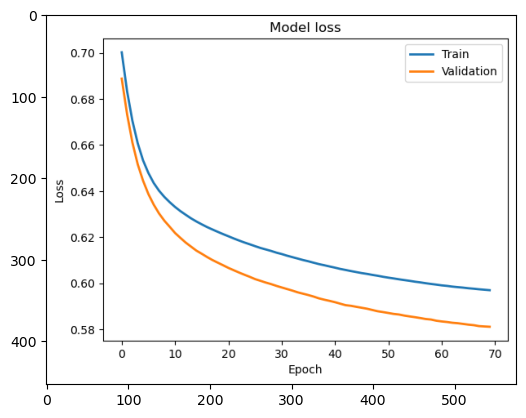

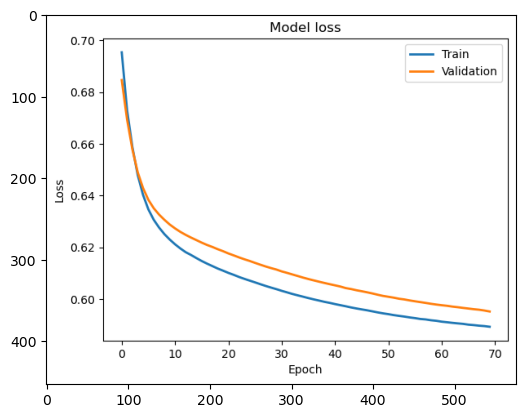

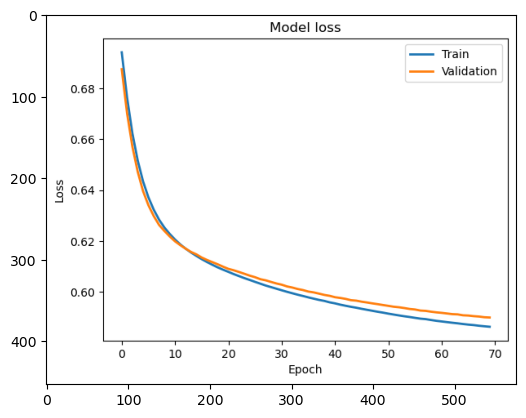

sem_tp_doador_layers_(3, 3)__activation_function_sigmoid__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.85__Beta2_0.9.pkl
0.7481428575067467


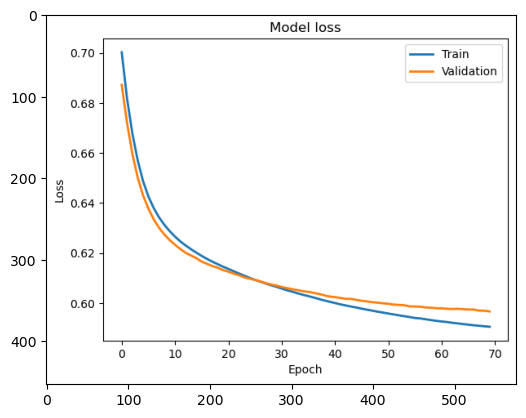

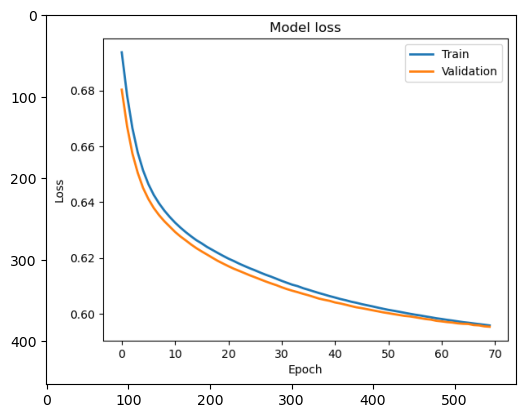

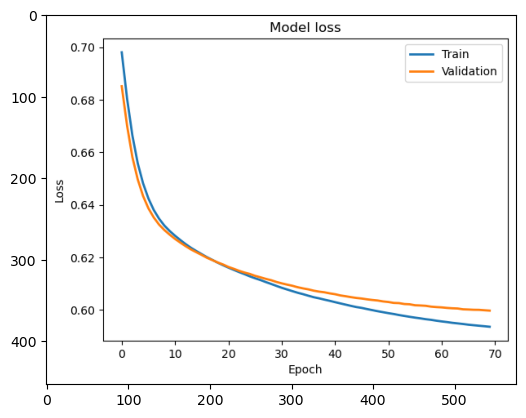

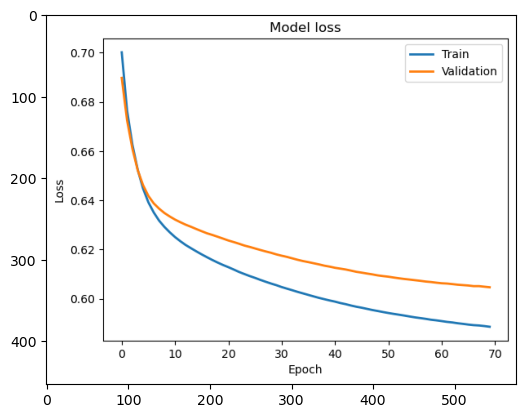

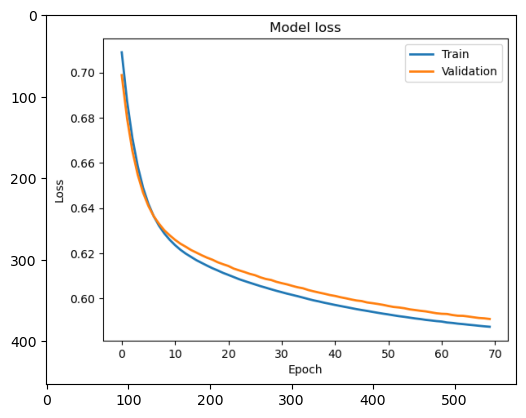

sem_tp_doador_layers_(3, 3)__activation_function_sigmoid__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.99__Beta2_0.9.pkl
0.7480372981149133


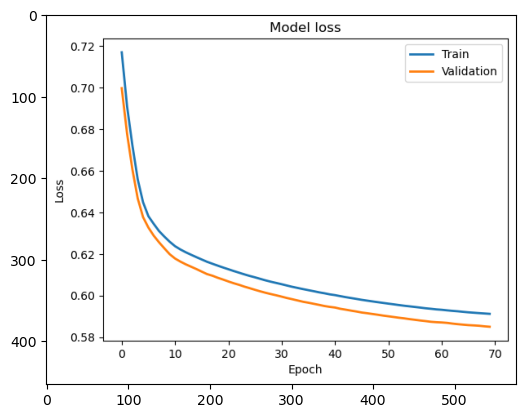

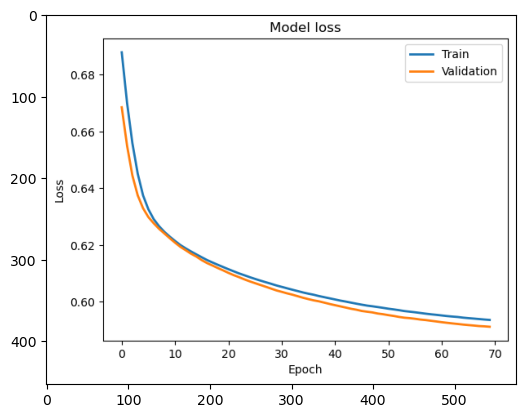

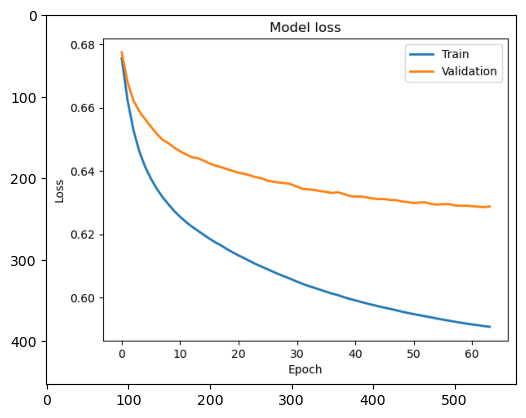

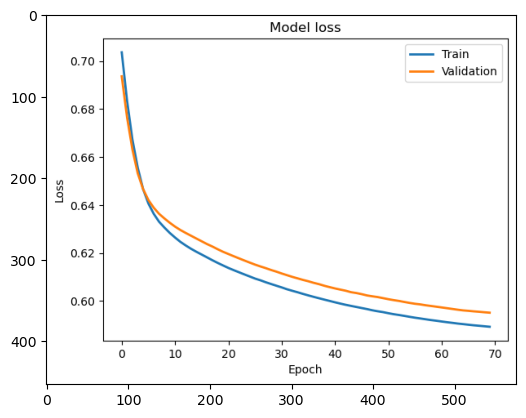

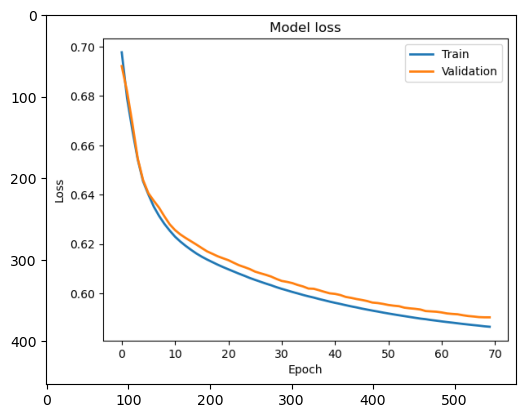

In [12]:
import matplotlib.image as mpimg

for i in range(10):
    index = auc_df.index[i]

    print(metrics_dict[index]["file_name"])
    print(metrics_dict[index]["auc"])
    
    for j in range(5):
        img = mpimg.imread(
            "learning_curves/"
            + "model-loss__"
            + metrics_dict[index]["file_name"]
            + "__fold_{}__.png".format(j)
        )
        imgplot = plt.imshow(img)
        plt.show()

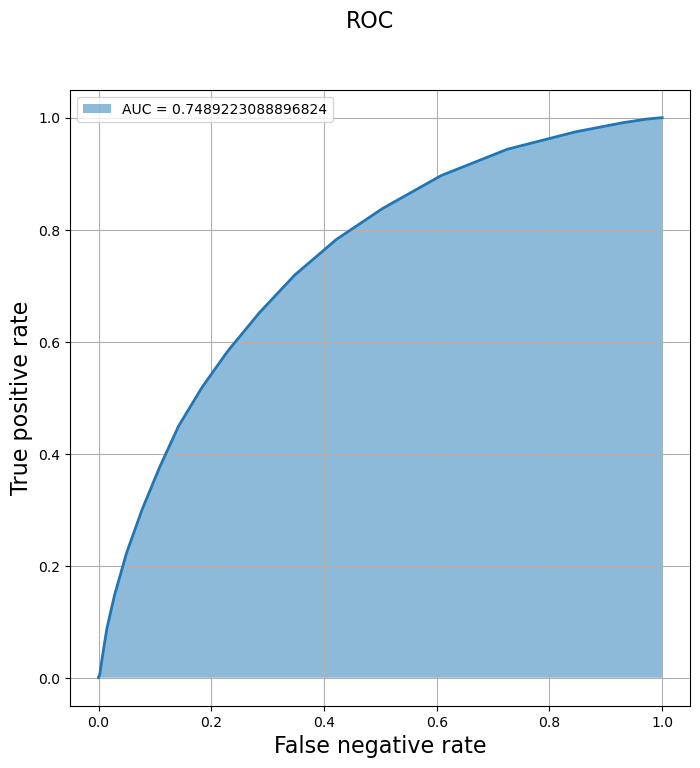

<Figure size 640x480 with 0 Axes>

In [13]:
scale = 1

width = height = 8

choice = 0

index = auc_df.index[choice]

best_nn_df = pd.DataFrame(metrics_dict[index])

fig = plt.figure(figsize=[scale * width, scale * height])
ax = fig.add_subplot(1, 1, 1)
fig.suptitle("ROC", fontsize=16)

ax.plot(
    best_nn_df.fpr,
    best_nn_df.tpr,
    linewidth=2,
)

ax.fill_between(
    best_nn_df.fpr,
    [0 for i in range(len(best_nn_df.fpr))],
    best_nn_df.tpr,
    alpha=0.5,
    label="AUC = {}".format(best_nn_df.auc.values[0]),
)

ax.set_ylabel("True positive rate", fontsize=16)
ax.set_xlabel("False negative rate", fontsize=16)

ax.legend()
ax.grid()

plt.show()

plt.savefig("figures/ROC.png")

In [14]:
best_nn_df = best_nn_df.sort_values(by=["bacc"],ascending=False)

best_nn_df.head(10)

,file_name,tp,tn,fp,fn,th,tpr,fpr,tnr,ppv,bacc,f1,auc
11,"sem_tp_doador_layers_(3, 3)__activation_functi...",6700,6044,3223,2620,0.458333,0.718884,0.347793,0.652207,0.675199,0.685545,0.696357,0.748922
12,"sem_tp_doador_layers_(3, 3)__activation_functi...",6075,6623,2644,3245,0.500000,0.651824,0.285313,0.714687,0.696754,0.683255,0.673541,0.748922
10,"sem_tp_doador_layers_(3, 3)__activation_functi...",7293,5359,3908,2027,0.416667,0.782511,0.421711,0.578289,0.651103,0.680400,0.710784,0.748922
13,"sem_tp_doador_layers_(3, 3)__activation_functi...",5435,7144,2123,3885,0.541667,0.583155,0.229092,0.770908,0.719106,0.677031,0.644034,0.748922
14,"sem_tp_doador_layers_(3, 3)__activation_functi...",4838,7563,1704,4482,0.583333,0.519099,0.183878,0.816122,0.739529,0.667610,0.610011,0.748922
9,"sem_tp_doador_layers_(3, 3)__activation_functi...",7810,4597,4670,1510,0.375000,0.837983,0.503939,0.496061,0.625801,0.667022,0.716514,0.748922
15,"sem_tp_doador_layers_(3, 3)__activation_functi...",4186,7953,1314,5134,0.625000,0.449142,0.141793,0.858207,0.761091,0.653674,0.564912,0.748922
8,"sem_tp_doador_layers_(3, 3)__activation_functi...",8357,3635,5632,963,0.333333,0.896674,0.607748,0.392252,0.597398,0.644463,0.717062,0.748922
16,"sem_tp_doador_layers_(3, 3)__activation_functi...",3495,8267,1000,5825,0.666667,0.375000,0.107910,0.892090,0.777531,0.633545,0.505972,0.748922
17,"sem_tp_doador_layers_(3, 3)__activation_functi...",2798,8552,715,6522,0.708333,0.300215,0.077155,0.922845,0.796470,0.611530,0.436063,0.748922


In [15]:
best_nn = best_nn_df.loc[11]
best_nn.file_name

'sem_tp_doador_layers_(3, 3)__activation_function_tanh__output_function_sigmoid__batch_200__iter_10__LearnR_0.001__Beta1_0.85__Beta2_0.85.pkl'

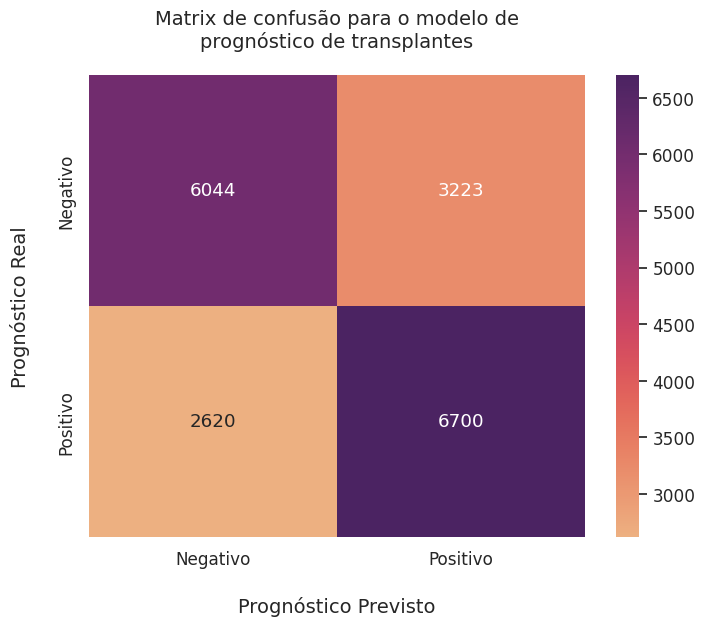

In [16]:
import seaborn as sns

# Mounting confusion Matrix

conf_matrix = np.array([[best_nn.tn, best_nn.fp], [best_nn.fn, best_nn.tp]],dtype=int)

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8, 6), dpi=100)
# Scale up the size of all text
sns.set(font_scale=1.1)

ax = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="flare"
)

# set x-axis label and ticks.
ax.set_xlabel("Prognóstico Previsto", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(["Negativo", "Positivo"])

# set y-axis label and ticks
ax.set_ylabel("Prognóstico Real", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(["Negativo", "Positivo"])

# set plot title
ax.set_title("Matrix de confusão para o modelo de\nprognóstico de transplantes", fontsize=14, pad=20)

plt.show()

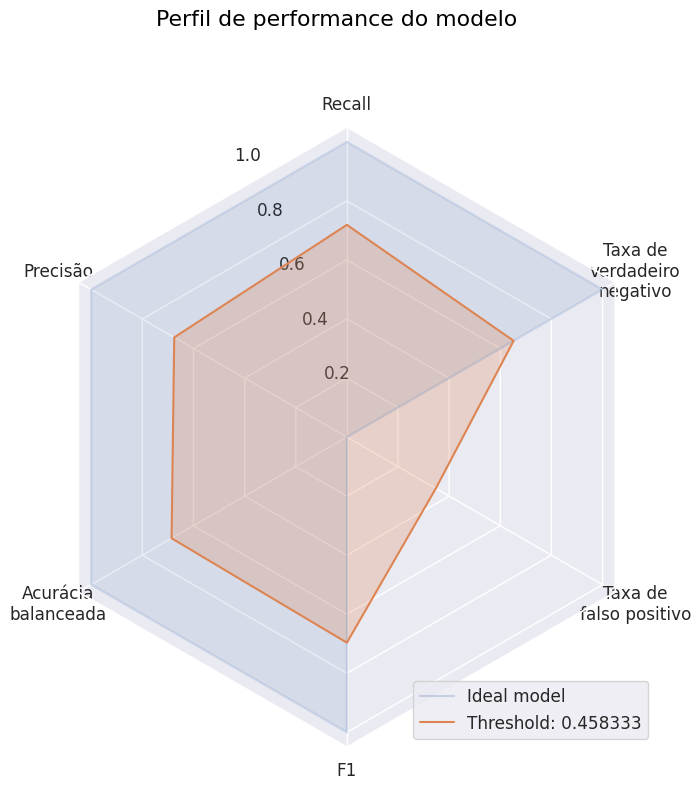

In [21]:
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame="circle"):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):
        name = "radar"
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location("N")

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == "circle":
                return Circle((0.5, 0.5), 0.5)
            elif frame == "polygon":
                return RegularPolygon((0.5, 0.5), num_vars, radius=0.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == "circle":
                return super()._gen_axes_spines()
            elif frame == "polygon":
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(
                    axes=self,
                    spine_type="circle",
                    path=Path.unit_regular_polygon(num_vars),
                )
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(
                    Affine2D().scale(0.5).translate(0.5, 0.5) + self.transAxes
                )
                return {"polar": spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta


N = 6
theta = radar_factory(N, frame="polygon")

spoke_labels = [
    "Recall",
    "Precisão",
    "Acurácia\nbalanceada",
    "F1",
    "Taxa de\nfalso positivo",
    "Taxa de\nverdadeiro\nnegativo",
]
metrics = [best_nn.tpr, best_nn.ppv, best_nn.bacc, best_nn.f1, best_nn.fpr, best_nn.tnr]

metrics_ideal = [1, 1, 1, 1, 0, 1]

# fig, axs = plt.subplots(
#     figsize=(9, 9), nrows=1, ncols=1, subplot_kw=dict(projection="radar")
# )

fig = plt.figure(figsize=[scale * width, scale * height])
ax = fig.add_subplot(1, 1, 1, projection="radar")

fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

ax.plot(theta, metrics_ideal, label="Ideal model", alpha=0.25)
ax.fill(theta, metrics_ideal, alpha=0.12)
ax.plot(theta, metrics, label="Threshold: {:.6f}".format(best_nn.th))
ax.fill(theta, metrics, alpha=0.25)
ax.set_varlabels(spoke_labels)

ax.legend()

fig.text(
    0.5,
    0.965,
    "Perfil de performance do modelo",
    horizontalalignment="center",
    color="black",
    size="large",
)

plt.show()